In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
file_path = "Nat_Gas(Task_1).csv"
df = pd.read_csv(file_path)

In [3]:
df.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [5]:
df['Dates'] = pd.to_datetime(df['Dates'])
df = df.sort_values('Dates')
df.set_index('Dates', inplace=True)


C:\Users\priya\AppData\Local\Temp\ipykernel_294208\2870545776.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [6]:
df['Dates'].head()


KeyError: 'Dates'

In [7]:
df.index


DatetimeIndex(['2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30'],
              dtype='datetime64[ns]', name='Dates', freq=None)

In [8]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%Y-%m-%d')


KeyError: 'Dates'

In [9]:
df.index = pd.to_datetime(df.index)


In [10]:
df.columns


Index(['Prices'], dtype='object')

In [11]:
df.rename(columns={'Prices': 'Price'}, inplace=True)


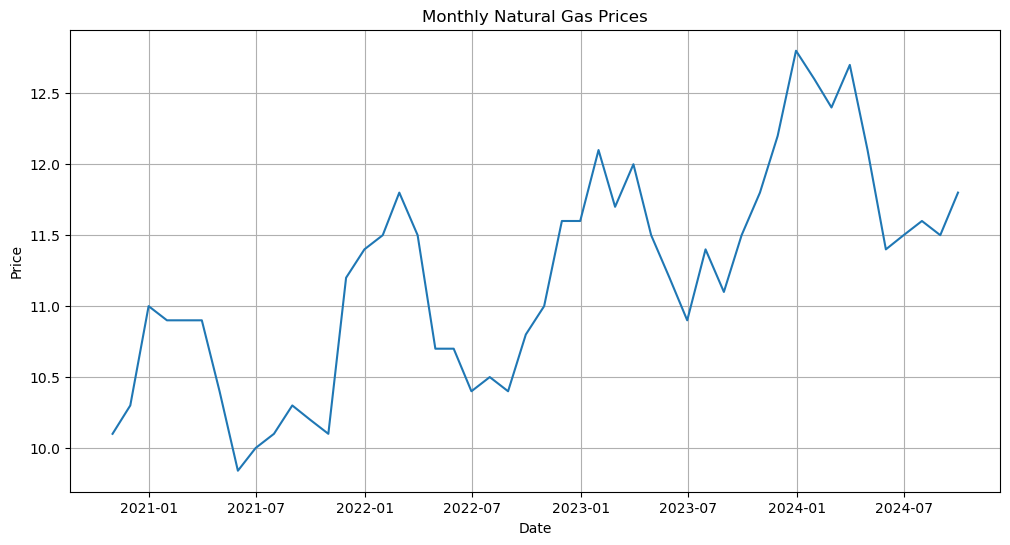

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Price'])
plt.title("Monthly Natural Gas Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [13]:
df.head()


,Price
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


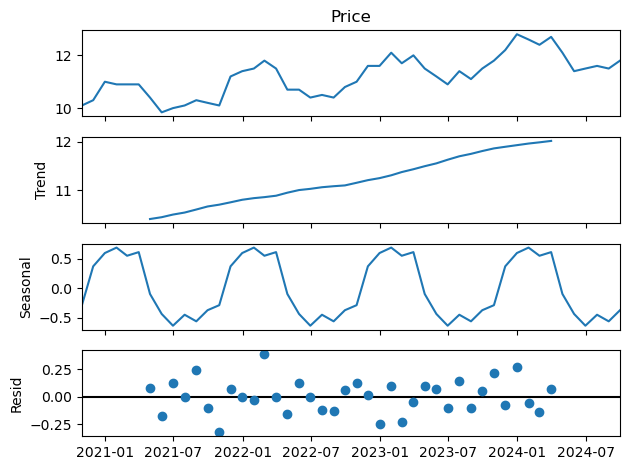

In [14]:
decomposition = seasonal_decompose(df['Price'], model='additive', period=12)
decomposition.plot()
plt.show()


In [15]:
seasonal = decomposition.seasonal
seasonal.head(15)


Dates
2020-10-31   -0.284051
2020-11-30    0.370671
2020-12-31    0.594838
2021-01-31    0.686505
2021-02-28    0.549005
2021-03-31    0.610116
2021-04-30   -0.095162
2021-05-31   -0.431829
2021-06-30   -0.629884
2021-07-31   -0.445162
2021-08-31   -0.556273
2021-09-30   -0.368773
2021-10-31   -0.284051
2021-11-30    0.370671
2021-12-31    0.594838
Name: seasonal, dtype: float64

In [17]:
#this above data shows that during winter prices are high thats why positive value
#Convert dates to numeric (for interpolation)
df['date_ordinal'] = df.index.map(pd.Timestamp.toordinal)


In [18]:
#Build interpolation model (past dates)
interp_model = interp1d(
    df['date_ordinal'],
    df['Price'],
    kind='linear',
    fill_value='extrapolate'
)


In [19]:
#Create future dates (1-year extrapolation)
future_dates = pd.date_range(
    start=df.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='M'
)

future_ordinals = future_dates.map(pd.Timestamp.toordinal)
future_prices = interp_model(future_ordinals)


C:\Users\priya\AppData\Local\Temp\ipykernel_294208\2514140048.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


In [20]:
#Create future dates (1-year extrapolation)
future_dates = pd.date_range(
    start=df.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='ME'
)

future_ordinals = future_dates.map(pd.Timestamp.toordinal)
future_prices = interp_model(future_ordinals)

In [21]:
#Combine historical + future data
future_df = pd.DataFrame(
    {'Price': future_prices},
    index=future_dates
)

full_df = pd.concat([df[['Price']], future_df])


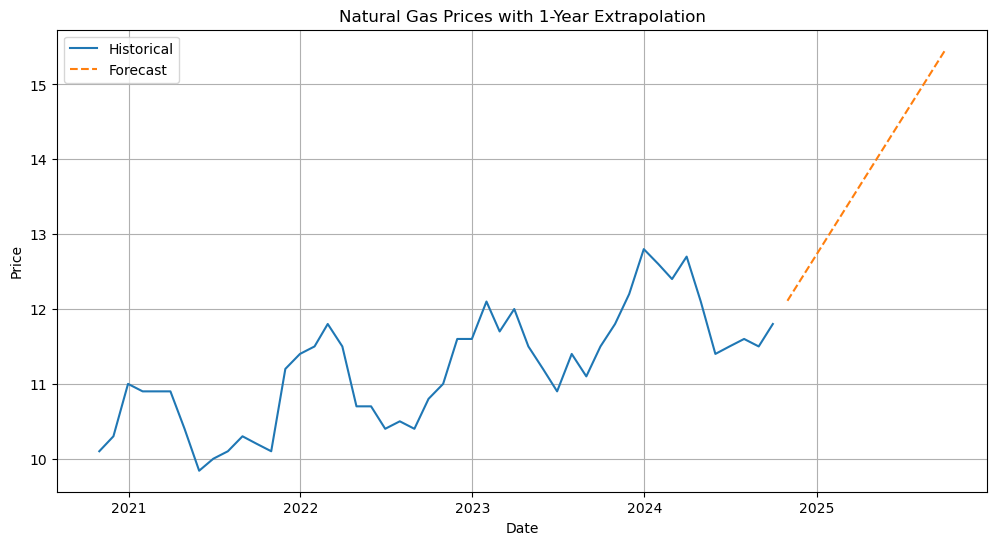

In [22]:
#Plot historical + extrapolated prices
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Price'], label='Historical')
plt.plot(future_df.index, future_df['Price'], 
         linestyle='--', label='Forecast')
plt.legend()
plt.title("Natural Gas Prices with 1-Year Extrapolation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [23]:
#Create final function (MAIN REQUIREMENT)
def estimate_gas_price(date_str):
    """
    Input: date string 'YYYY-MM-DD'
    Output: estimated natural gas price
    """
    date = pd.to_datetime(date_str)
    ordinal = date.toordinal()
    price = float(interp_model(ordinal))
    return round(price, 2)


In [24]:
#Test the function
estimate_gas_price("2022-01-15")


11.45

In [25]:
estimate_gas_price("2025-06-01")


14.24